In [1]:
# Importing relevant packages
import os
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
#import pandas.util.testing
import time
from dask import dataframe as dd
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
%%time
df=pd.read_csv(r"D:\A complete Resuorce\DataScience\TCS FILES\LoanDataset\Documents\InitialData\final_df.csv")

Wall time: 2min 54s


In [3]:
##Count the number of unique values in "Default" column
loan_status_dist = df['Default'].value_counts()

In [4]:
#Configuring the size 
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9,5)

Text(0.5, 1.0, 'Distribution of good and Bad Payments')

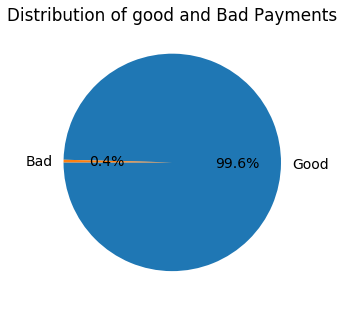

In [5]:
#Pie plot to find good and bad loans ratio
plt.pie(loan_status_dist,autopct='%1.1f%%',startangle=180,labels=['Good','Bad']);
plt.title("Distribution of good and Bad Payments")

In [6]:
#Divide the values into 4 quaters
pd.qcut(df['Orig_DTI_ratio'],q=4).value_counts()

(0.999, 28.0]    1889538
(36.0, 43.0]     1862891
(28.0, 36.0]     1733272
(43.0, 999.0]    1694104
Name: Orig_DTI_ratio, dtype: int64

In [7]:
#Minimum Orig_DTI_ratio
df['Orig_DTI_ratio'].min()

1

In [8]:
#Maximum Orig_DTI_ratio
df['Orig_DTI_ratio'].max()

999

In [9]:
#Creating bins for DTI Ratio
good_DTI_ratio_bin1 = df.loc[(df['Default']==0) & (df['Orig_DTI_ratio']>=0.999) &
(df['Orig_DTI_ratio']<28.0),'Orig_DTI_ratio'].count()
bad_DTI_ratio_bin1 = df.loc[(df['Default']==1) & (df['Orig_DTI_ratio']>=0.999) &
(df['Orig_DTI_ratio']<28.0),'Orig_DTI_ratio'].count()

good_DTI_ratio_bin2 = df.loc[(df['Default']==0) & (df['Orig_DTI_ratio']>=28.0) &
(df['Orig_DTI_ratio']<36.0),'Orig_DTI_ratio'].count()
bad_DTI_ratio_bin2 = df.loc[(df['Default']==1) & (df['Orig_DTI_ratio']>=28.0) &
(df['Orig_DTI_ratio']<36.0),'Orig_DTI_ratio'].count()

good_DTI_ratio_bin3 = df.loc[(df['Default']==0) & (df['Orig_DTI_ratio']>=36.0) &
(df['Orig_DTI_ratio']<43.0),'Orig_DTI_ratio'].count()
bad_DTI_ratio_bin3 = df.loc[(df['Default']==1) & (df['Orig_DTI_ratio']>=36.0) &
(df['Orig_DTI_ratio']<43.0),'Orig_DTI_ratio'].count()

good_DTI_ratio_bin4 = df.loc[(df['Default']==0) & (df['Orig_DTI_ratio']>=43.0) &
(df['Orig_DTI_ratio']<999.0),'Orig_DTI_ratio'].count()
bad_DTI_ratio_bin4 = df.loc[(df['Default']==1) & (df['Orig_DTI_ratio']>=43.0) &
(df['Orig_DTI_ratio']<999.0),'Orig_DTI_ratio'].count()



#Find the ratio if Good and bad loans based on DTI Ratio
good_or_bad_ratio_wro_DTI_ratio_bin1 = good_DTI_ratio_bin1/bad_DTI_ratio_bin1
good_or_bad_ratio_wro_DTI_ratio_bin2 = good_DTI_ratio_bin2/bad_DTI_ratio_bin2
good_or_bad_ratio_wro_DTI_ratio_bin3 = good_DTI_ratio_bin3/bad_DTI_ratio_bin3
good_or_bad_ratio_wro_DTI_ratio_bin4 = good_DTI_ratio_bin4/bad_DTI_ratio_bin4




Text(0.5, 1.0, 'Loan Analysis wrt DTI_ratio')

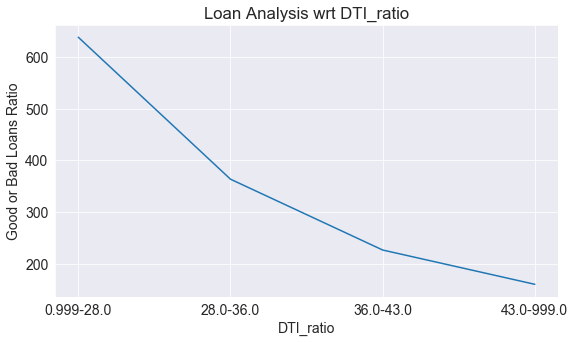

In [11]:
#Stying for grid and analysis of Loan Wrto DTI Ratio
sns.set_style('darkgrid')

plt.plot([good_or_bad_ratio_wro_DTI_ratio_bin1,good_or_bad_ratio_wro_DTI_ratio_bin2,
         good_or_bad_ratio_wro_DTI_ratio_bin3,
         good_or_bad_ratio_wro_DTI_ratio_bin4,])
plt.xticks(np.arange(4),['0.999-28.0','28.0-36.0','36.0-43.0','43.0-999.0']);
plt.xlabel("DTI_ratio");
plt.ylabel("Good or Bad Loans Ratio");
plt.title("Loan Analysis wrt DTI_ratio")

In [6]:
#Minimum intrest rate
df['Orig_Interest_rate'].min()

2.25

In [7]:
#Maximum interest Rate
df['Orig_Interest_rate'].max()

6.625

In [8]:
#Creating good and bad loans based on Interest rate
good_interest_rate_bin1=df.loc[(df['Default']==0) & (df['Orig_Interest_rate']>=2) &
(df['Orig_Interest_rate']<3),'Orig_Interest_rate'].count()
bad_interest_rate_bin1=df.loc[(df['Default']==1) & (df['Orig_Interest_rate']>=2) &
(df['Orig_Interest_rate']<3),'Orig_Interest_rate'].count()

good_interest_rate_bin2=df.loc[(df['Default']==0) & (df['Orig_Interest_rate']>=3) &
(df['Orig_Interest_rate']<4),'Orig_Interest_rate'].count()
bad_interest_rate_bin2=df.loc[(df['Default']==1) & (df['Orig_Interest_rate']>=3) &
(df['Orig_Interest_rate']<4),'Orig_Interest_rate'].count()

good_interest_rate_bin3=df.loc[(df['Default']==0) & (df['Orig_Interest_rate']>=4) &
(df['Orig_Interest_rate']<5),'Orig_Interest_rate'].count()
bad_interest_rate_bin3=df.loc[(df['Default']==1) & (df['Orig_Interest_rate']>=4) &
(df['Orig_Interest_rate']<5),'Orig_Interest_rate'].count()

good_interest_rate_bin4=df.loc[(df['Default']==0) & (df['Orig_Interest_rate']>=5) &
(df['Orig_Interest_rate']<6),'Orig_Interest_rate'].count()
bad_interest_rate_bin4=df.loc[(df['Default']==1) & (df['Orig_Interest_rate']>=5) &
(df['Orig_Interest_rate']<6),'Orig_Interest_rate'].count()

good_interest_rate_bin5=df.loc[(df['Default']==0) & (df['Orig_Interest_rate']>=6) &
(df['Orig_Interest_rate']<7),'Orig_Interest_rate'].count()
bad_interest_rate_bin5=df.loc[(df['Default']==1) & (df['Orig_Interest_rate']>=6) &
(df['Orig_Interest_rate']<7),'Orig_Interest_rate'].count()

#Find the ratio if Good and bad loans based on interest rate

good_or_bad_ratio_wro_interest_rate_bin1 = good_interest_rate_bin1/bad_interest_rate_bin1

good_or_bad_ratio_wro_interest_rate_bin2 = good_interest_rate_bin2/bad_interest_rate_bin2

good_or_bad_ratio_wro_interest_rate_bin3 = good_interest_rate_bin3/bad_interest_rate_bin3

good_or_bad_ratio_wro_interest_rate_bin4 = good_interest_rate_bin4/bad_interest_rate_bin4

good_or_bad_ratio_wro_interest_rate_bin5 = good_interest_rate_bin5/bad_interest_rate_bin5

Text(0.5, 1.0, 'Loan Analysis wrt Interest Rate')

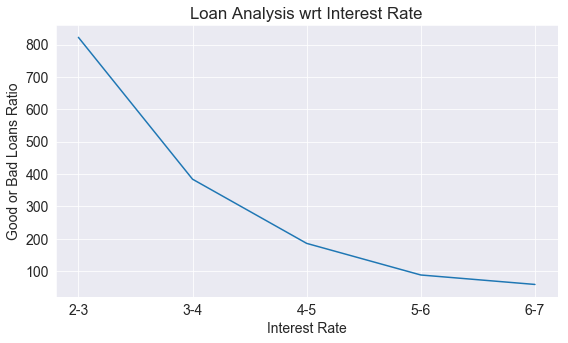

In [9]:
#Stying for grid and analysis of Loan Wrto Interest rate
sns.set_style('darkgrid')

plt.plot([good_or_bad_ratio_wro_interest_rate_bin1,good_or_bad_ratio_wro_interest_rate_bin2,
         good_or_bad_ratio_wro_interest_rate_bin3,
         good_or_bad_ratio_wro_interest_rate_bin4,good_or_bad_ratio_wro_interest_rate_bin5])
plt.xticks(np.arange(5),['2-3','3-4','4-5','5-6','6-7']);
plt.xlabel("Interest Rate");
plt.ylabel("Good or Bad Loans Ratio");
plt.title("Loan Analysis wrt Interest Rate")

In [11]:
#Divide the values into 4 quaters
pd.qcut(df['UNRATE'],q=4).value_counts()

(3.499, 3.8]    3047709
(4.0, 4.8]      1958871
(4.8, 14.7]     1853759
(3.8, 4.0]       902547
Name: UNRATE, dtype: int64

In [12]:
# minimum unemployment rate
df['UNRATE'].min()

3.5

In [13]:
# maximum unemployment rate
df['UNRATE'].max()

14.7

In [14]:
#Creating bins for Unemployment rate
good_unemp_rate_bin1 = df.loc[(df['Default']==0) & (df['UNRATE']>=3.5) &
(df['UNRATE']<3.7),'UNRATE'].count()
bad_unemp_rate_bin1 = df.loc[(df['Default']==1) & (df['UNRATE']>=3.5) &
(df['UNRATE']<3.7),'UNRATE'].count()

good_unemp_rate_bin2 = df.loc[(df['Default']==0) & (df['UNRATE']>=3.7) &
(df['UNRATE']<4),'UNRATE'].count()
bad_unemp_rate_bin2 = df.loc[(df['Default']==1) & (df['UNRATE']>=3.7) &
(df['UNRATE']<4),'UNRATE'].count()

good_unemp_rate_bin3 = df.loc[(df['Default']==0) & (df['UNRATE']>=4) &
(df['UNRATE']<4.8),'UNRATE'].count()
bad_unemp_rate_bin3 = df.loc[(df['Default']==1) & (df['UNRATE']>=4) &
(df['UNRATE']<4.8),'UNRATE'].count()

good_unemp_rate_bin4 = df.loc[(df['Default']==0) & (df['UNRATE']>=4.8) &
(df['UNRATE']<14.8),'UNRATE'].count()
bad_unemp_rate_bin4 = df.loc[(df['Default']==1) & (df['UNRATE']>=4.8) &
(df['UNRATE']<14.8),'UNRATE'].count()

#Find the ratio if Good and bad loans based on interest rate
good_or_bad_ratio_wro_unemp_rate_bin1 = good_unemp_rate_bin1/bad_unemp_rate_bin1
good_or_bad_ratio_wro_unemp_rate_bin2 = good_unemp_rate_bin2/bad_unemp_rate_bin2
good_or_bad_ratio_wro_unemp_rate_bin3 = good_unemp_rate_bin3/bad_unemp_rate_bin3
good_or_bad_ratio_wro_unemp_rate_bin4 = good_unemp_rate_bin4/bad_unemp_rate_bin4




Text(0.5, 1.0, 'Loan Analysis wrt Unemployment Rate')

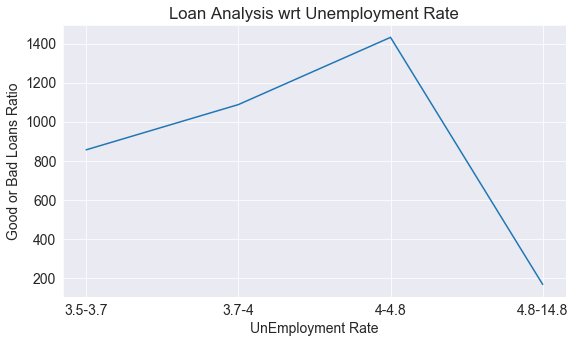

In [15]:
#Stying for grid and analysis of Loan Wrto UN Employment rate
sns.set_style('darkgrid')

plt.plot([good_or_bad_ratio_wro_unemp_rate_bin1,good_or_bad_ratio_wro_unemp_rate_bin2,
         good_or_bad_ratio_wro_unemp_rate_bin3,
         good_or_bad_ratio_wro_unemp_rate_bin4,])
plt.xticks(np.arange(4),['3.5-3.7','3.7-4','4-4.8','4.8-14.8']);
plt.xlabel("UnEmployment Rate");
plt.ylabel("Good or Bad Loans Ratio");
plt.title("Loan Analysis wrt Unemployment Rate")

In [16]:
#Divide the values into 4 quaters
pd.qcut(df['CSUSHPINSA'],q=4).value_counts()

(166.65, 194.857]     2017758
(204.98, 212.032]     1970357
(212.032, 234.456]    1889071
(194.857, 204.98]     1885700
Name: CSUSHPINSA, dtype: int64

In [17]:
# minimum HPI index
df['CSUSHPINSA'].min()

166.65099999999995

In [18]:
# maximum HPI index
df['CSUSHPINSA'].max()

234.456

In [19]:
#Creating good and bad loans based on House Price Index rate
good_hpi_rate_bin1=df.loc[(df['Default']==0) & (df['CSUSHPINSA']>=166.5) &
(df['CSUSHPINSA']<195),'CSUSHPINSA'].count()
bad_hpi_rate_bin1=df.loc[(df['Default']==1) & (df['CSUSHPINSA']>=166.5) &
(df['CSUSHPINSA']<195),'CSUSHPINSA'].count()

good_hpi_rate_bin2=df.loc[(df['Default']==0) & (df['CSUSHPINSA']>=195) &
(df['CSUSHPINSA']<205),'CSUSHPINSA'].count()
bad_hpi_rate_bin2=df.loc[(df['Default']==1) & (df['CSUSHPINSA']>=195) &
(df['CSUSHPINSA']<205),'CSUSHPINSA'].count()

good_hpi_rate_bin3=df.loc[(df['Default']==0) & (df['CSUSHPINSA']>=205) &
(df['CSUSHPINSA']<212.5),'CSUSHPINSA'].count()
bad_hpi_rate_bin3=df.loc[(df['Default']==1) & (df['CSUSHPINSA']>=205) &
(df['CSUSHPINSA']<212.5),'CSUSHPINSA'].count()

good_hpi_rate_bin4=df.loc[(df['Default']==0) & (df['CSUSHPINSA']>=212.5) &
(df['CSUSHPINSA']<234.5),'CSUSHPINSA'].count()
bad_hpi_rate_bin4=df.loc[(df['Default']==1) & (df['CSUSHPINSA']>=212.5) &
(df['CSUSHPINSA']<234.5),'CSUSHPINSA'].count()


#Find the ratio if Good and bad loans based on interest rate

good_or_bad_ratio_wro_hpi_rate_bin1 = good_hpi_rate_bin1/bad_hpi_rate_bin1

good_or_bad_ratio_wro_hpi_rate_bin2 = good_hpi_rate_bin2/bad_hpi_rate_bin2

good_or_bad_ratio_wro_hpi_rate_bin3 = good_hpi_rate_bin3/bad_hpi_rate_bin3

good_or_bad_ratio_wro_hpi_rate_bin4 = good_hpi_rate_bin4/bad_hpi_rate_bin4


Text(0.5, 1.0, 'Loan Analysis wrt House Price Index Rate')

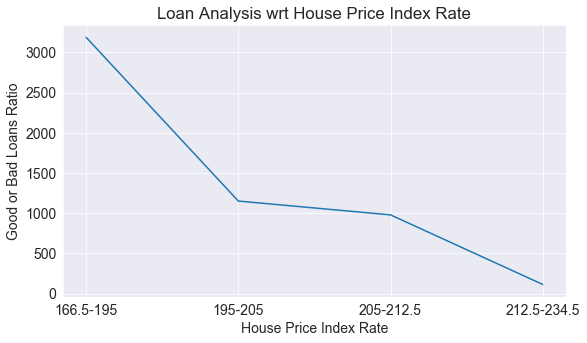

In [20]:
#Stying for grid and analysis of Loan Wrto UN Employment rate
sns.set_style('darkgrid')

plt.plot([good_or_bad_ratio_wro_hpi_rate_bin1,good_or_bad_ratio_wro_hpi_rate_bin2,
         good_or_bad_ratio_wro_hpi_rate_bin3,
         good_or_bad_ratio_wro_hpi_rate_bin4,])
plt.xticks(np.arange(4),['166.5-195','195-205','205-212.5','212.5-234.5']);
plt.xlabel("House Price Index Rate");
plt.ylabel("Good or Bad Loans Ratio");
plt.title("Loan Analysis wrt House Price Index Rate")

In [21]:
# Using Credit Score to analyse good and bad loans
credit_range_good1 = df.loc[(df['Credit_score']>=300) & (df['Credit_score']<579) & (df['Default']==0),"Default"].count()
credit_range_good2 = df.loc[(df['Credit_score']>=580) & (df['Credit_score']<669) & (df['Default']==0),"Default"].count()
credit_range_good3 = df.loc[(df['Credit_score']>=670) & (df['Credit_score']<739) & (df['Default']==0),"Default"].count()
credit_range_good4 = df.loc[(df['Credit_score']>=740) & (df['Credit_score']<799) & (df['Default']==0),"Default"].count()
credit_range_good5 = df.loc[(df['Credit_score']>=800) & (df['Credit_score']<850) & (df['Default']==0),"Default"].count()


credit_range_bad1 = df.loc[(df.Credit_score>=300) & (df.Credit_score<579) & (df.Default==1),"Default"].count()
credit_range_bad2 = df.loc[(df.Credit_score>=580) & (df.Credit_score<669) & (df.Default==1),"Default"].count()
credit_range_bad3 = df.loc[(df.Credit_score>=670) & (df.Credit_score<739) & (df.Default==1),"Default"].count()
credit_range_bad4 = df.loc[(df.Credit_score>=740) & (df.Credit_score<799) & (df.Default==1),"Default"].count()
credit_range_bad5 = df.loc[(df.Credit_score>=800) & (df.Credit_score<850) & (df.Default==1),"Default"].count()

#Find the ratio if Good and bad loans based on credit score


good_to_bad_wrt_credit_range_bin1 = credit_range_good1/credit_range_bad1
good_to_bad_wrt_credit_range_bin2 = credit_range_good2/credit_range_bad2
good_to_bad_wrt_credit_range_bin3 = credit_range_good3/credit_range_bad3
good_to_bad_wrt_credit_range_bin4 = credit_range_good4/credit_range_bad4
good_to_bad_wrt_credit_range_bin5 = credit_range_good5/credit_range_bad5

Text(0.5, 1.0, 'Loan Analysis wrt Credit Score Range')

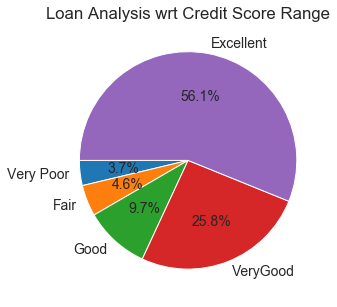

In [22]:
#Stying for grid and analysis of Loan Wrto Credit Score range
sns.set_style('darkgrid')

plt.pie([good_to_bad_wrt_credit_range_bin1,good_to_bad_wrt_credit_range_bin2,
         good_to_bad_wrt_credit_range_bin3,
         good_to_bad_wrt_credit_range_bin4,good_to_bad_wrt_credit_range_bin5],autopct='%1.1f%%',
         startangle=180,labels=['Very Poor','Fair','Good','VeryGood','Excellent'] )
plt.title("Loan Analysis wrt Credit Score Range")

Text(0.5, 1.0, 'Loan Analysis wrt Credit Score Range')

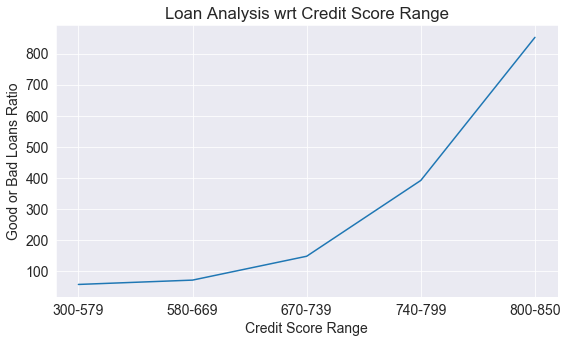

In [23]:
#Stying for grid and analysis of Loan Wrto UN Employment rate
sns.set_style('darkgrid')

plt.plot([good_to_bad_wrt_credit_range_bin1,good_to_bad_wrt_credit_range_bin2,
         good_to_bad_wrt_credit_range_bin3,
         good_to_bad_wrt_credit_range_bin4,good_to_bad_wrt_credit_range_bin5])
plt.xticks(np.arange(5),['300-579','580-669','670-739','740-799','800-850']);
plt.xlabel("Credit Score Range");
plt.ylabel("Good or Bad Loans Ratio");
plt.title("Loan Analysis wrt Credit Score Range")

In [24]:
# minimum Loan repayment months
df['Orig_loan_term'].min()

96

In [25]:
# maximum loan repayment months
df['Orig_loan_term'].max()

543

In [26]:
# Using Credit Score to analyse good and bad loans
loan_term_range_good1 = df.loc[(df['Orig_loan_term']>=0) & (df['Orig_loan_term']<100) & (df['Default']==0),"Default"].count()
loan_term_range_good2 = df.loc[(df['Orig_loan_term']>=100) & (df['Orig_loan_term']<200) & (df['Default']==0),"Default"].count()
loan_term_range_good3 = df.loc[(df['Orig_loan_term']>=200) & (df['Orig_loan_term']<300) & (df['Default']==0),"Default"].count()
loan_term_range_good4 = df.loc[(df['Orig_loan_term']>=300) & (df['Orig_loan_term']<400) & (df['Default']==0),"Default"].count()
loan_term_range_good5 = df.loc[(df['Orig_loan_term']>=400) & (df['Orig_loan_term']<545) & (df['Default']==0),"Default"].count()


loan_term_range_bad1 = df.loc[(df.Credit_score>=0) & (df.Credit_score<100) & (df.Default==1),"Default"].count()
loan_term_range_bad2 = df.loc[(df.Credit_score>=100) & (df.Credit_score<200) & (df.Default==1),"Default"].count()
loan_term_range_bad3 = df.loc[(df.Credit_score>=200) & (df.Credit_score<300) & (df.Default==1),"Default"].count()
loan_term_range_bad4 = df.loc[(df.Credit_score>=300) & (df.Credit_score<400) & (df.Default==1),"Default"].count()
loan_term_range_bad5 = df.loc[(df.Credit_score>=400) & (df.Credit_score<545) & (df.Default==1),"Default"].count()

#Find the ratio if Good and bad loans based on credit score


good_to_bad_wrt_loan_term_bin1 = credit_range_good1/credit_range_bad1
good_to_bad_wrt_loan_term_bin2 = credit_range_good2/credit_range_bad2
good_to_bad_wrt_loan_term_bin3 = credit_range_good3/credit_range_bad3
good_to_bad_wrt_loan_term_bin4 = credit_range_good4/credit_range_bad4
good_to_bad_wrt_loan_term_bin5 = credit_range_good5/credit_range_bad5

Text(0.5, 1.0, 'Loan Analysis wrt Loan Term Range')

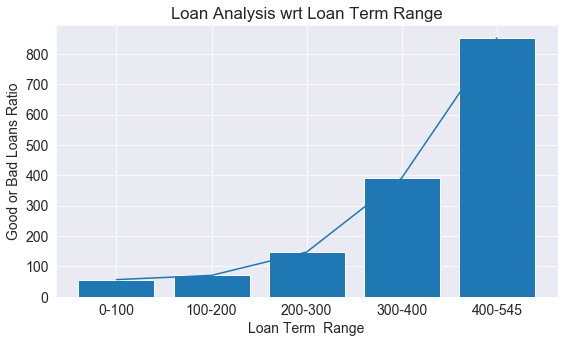

In [27]:
#Stying for grid and analysis of Loan Wrto loan term rate

plt.bar(['0-100','100-200','200-300','300-400','400-545'],[good_to_bad_wrt_loan_term_bin1,
       good_to_bad_wrt_loan_term_bin2,good_to_bad_wrt_loan_term_bin3,
       good_to_bad_wrt_loan_term_bin4,good_to_bad_wrt_loan_term_bin5])

plt.plot([good_to_bad_wrt_loan_term_bin1,good_to_bad_wrt_loan_term_bin2,
         good_to_bad_wrt_loan_term_bin3,
         good_to_bad_wrt_loan_term_bin4,good_to_bad_wrt_loan_term_bin5])

plt.xlabel("Loan Term  Range");
plt.ylabel("Good or Bad Loans Ratio");
plt.title("Loan Analysis wrt Loan Term Range")